<a href="https://colab.research.google.com/github/Nirmal456/Machine-Learning-labs/blob/main/Lab4(2)_AP23110010200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression on Iris (Colab-ready)

A gentle, end-to-end notebook for **Logistic Regression** using the classic **Iris** dataset.

We will:
1. Load the data
2. Explore and visualize
3. Split into train/test
4. Train Logistic Regression
5. Evaluate with accuracy, confusion matrix, classification report
6. Try a few test-time predictions

**Tip:** Run cells from top to bottom. If you get a warning about convergence, we set a higher `max_iter` later.


In [ ]:
# 0) Setup: install/upgrade packages if needed (Colab usually has these)
import sys
print(sys.version)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
%matplotlib inline


3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


## 1) Load the Iris dataset
We'll use `sklearn.datasets.load_iris`. It returns features `data`, labels `target`, and metadata like feature names and target names.

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
target_names = iris.target_names
feature_names = iris.feature_names
print(f"Shape X: {X.shape}, y: {y.shape}")
X.head()

Shape X: (150, 4), y: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2) Quick EDA & Visualization
- Peek at basic statistics
- Plot histograms
- A simple scatter plot (petal length vs petal width)

> We stick to `matplotlib` to keep it lightweight and portable.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


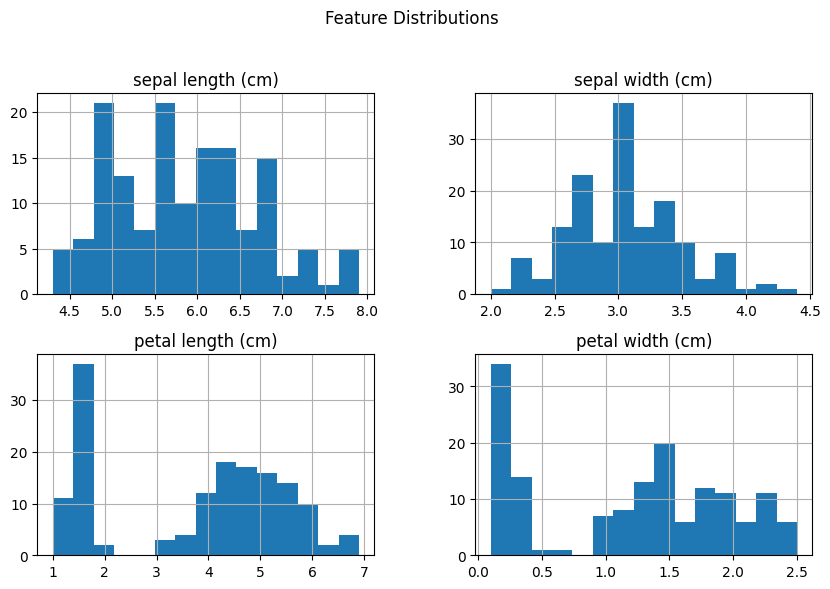

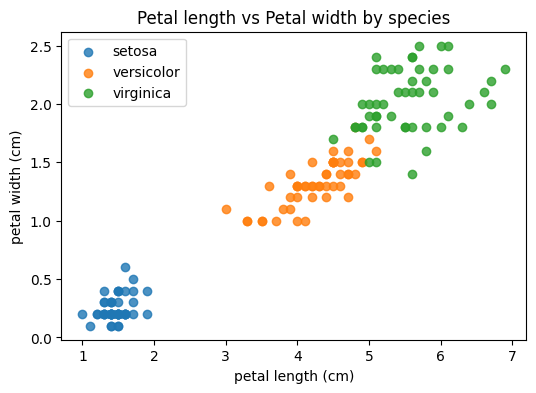

In [ ]:
display(X.describe())

# Histograms for each feature
ax = X.hist(bins=15, figsize=(10,6))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Simple scatter: petal length vs petal width colored by species
plt.figure(figsize=(6,4))
for cls in np.unique(y):
    mask = (y == cls)
    plt.scatter(X.loc[mask, feature_names[2]], X.loc[mask, feature_names[3]], label=target_names[cls], alpha=0.8)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title("Petal length vs Petal width by species")
plt.legend()
plt.show()

## 3) Train/Test Split
We'll do a stratified split so that each class is represented proportionally in both training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Train class counts:\n", y_train.value_counts().sort_index())
print("Test class counts:\n", y_test.value_counts().sort_index())

Train shape: (120, 4)  Test shape: (30, 4)
Train class counts:
 target
0    40
1    40
2    40
Name: count, dtype: int64
Test class counts:
 target
0    10
1    10
2    10
Name: count, dtype: int64


## 4) (Optional) Feature Scaling
Logistic Regression can benefit from scaling. We will standardize features using `StandardScaler`.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_train_scaled[:3]

array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496]])

## 5) Train Logistic Regression
- We use `multi_class='auto'` which picks OvR or multinomial depending on the solver.
- `lbfgs` works well; we set `max_iter=1000` to avoid convergence warnings.


In [ ]:
logreg = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs', random_state=42)
logreg.fit(X_train_scaled, y_train)
print("Training complete.")

Training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## 6) Evaluate on Test Set
- Accuracy
- Confusion Matrix
- Classification Report (precision, recall, f1-score per class)


Test Accuracy: 0.9333


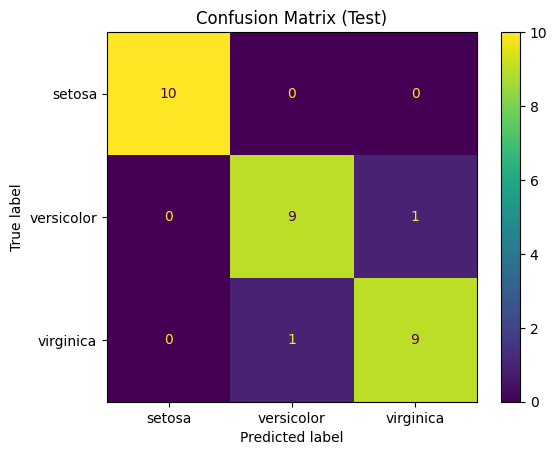

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
y_pred = logreg.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(values_format='d')
plt.title("Confusion Matrix (Test)")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

## 7) Try Some Predictions
We'll feed a couple of handmade samples to the trained model.

Order of features:
- sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

Each row below is `[sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]`.

In [ ]:
X_new = np.array([
    [5.1, 3.5, 1.4, 0.2],  # likely setosa
    [6.0, 2.8, 4.5, 1.5],  # likely versicolor
    [6.5, 3.0, 5.5, 2.0],  # likely virginica
])
X_new_scaled = scaler.transform(X_new)
preds = logreg.predict(X_new_scaled)
probs = logreg.predict_proba(X_new_scaled)
for i, (p, pr) in enumerate(zip(preds, probs)):
    print(f"Sample {i}: predicted -> {target_names[p]} | probabilities -> {np.round(pr, 3)}")

Sample 0: predicted -> setosa | probabilities -> [0.981 0.019 0.   ]
Sample 1: predicted -> versicolor | probabilities -> [0.01  0.75  0.239]
Sample 2: predicted -> virginica | probabilities -> [0.    0.103 0.896]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 8) (Optional) Save Model
In case you want to persist the trained model and scaler for later use.

In [ ]:
import joblib
joblib.dump(logreg, "logreg_iris.joblib")
joblib.dump(scaler, "scaler_iris.joblib")
print("Saved: logreg_iris.joblib and scaler_iris.joblib")

Saved: logreg_iris.joblib and scaler_iris.joblib


## 9) Homework Ideas (for students)
- Remove scaling and compare accuracy.
- Change `test_size` (e.g., 0.3) — how does it affect performance?
- Try `penalty='l1'` with solver `'liblinear'` and compare.
- Plot decision boundaries for two features at a time.
- Compute cross-validation accuracy using `cross_val_score`.


3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Shape X: (150, 4), y: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


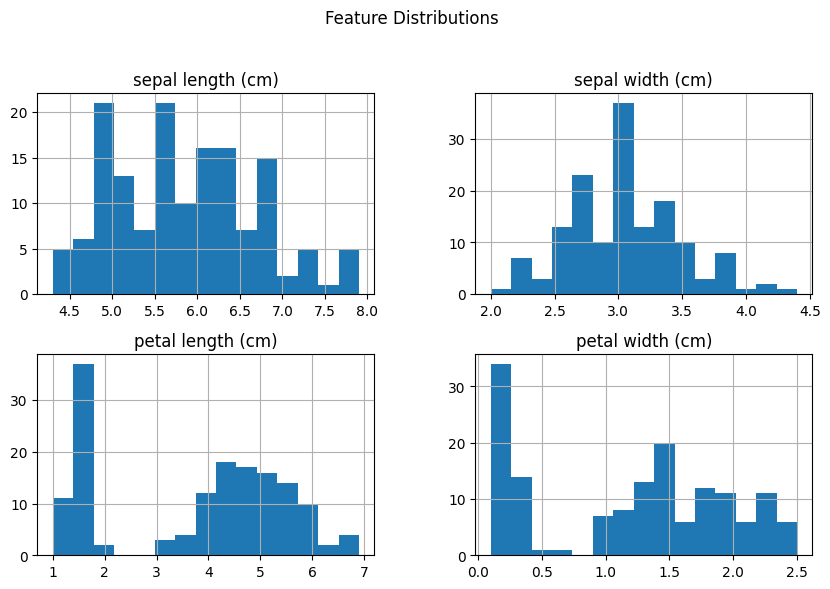

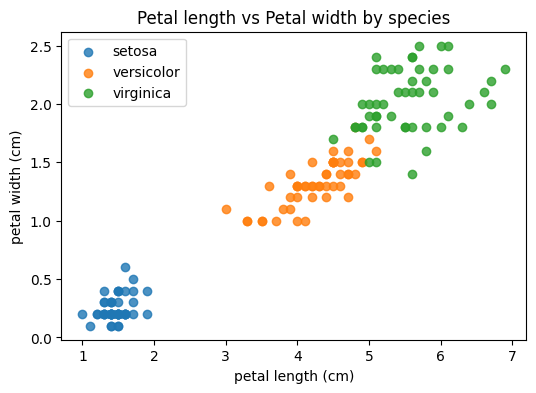

Train shape: (120, 4)  Test shape: (30, 4)
Train class counts:
 target
0    40
1    40
2    40
Name: count, dtype: int64
Test class counts:
 target
0    10
1    10
2    10
Name: count, dtype: int64
Training complete.
Test Accuracy: 0.9333


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


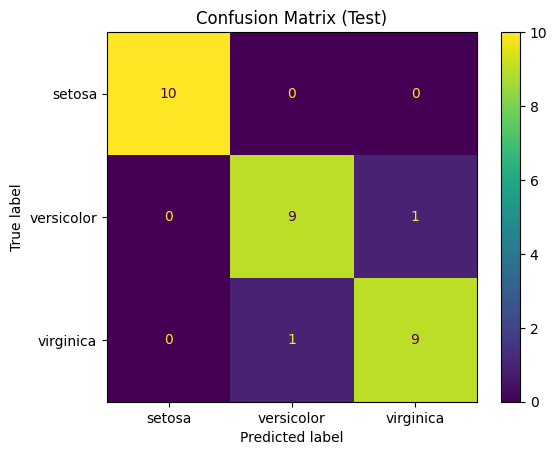

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Sample 0: predicted -> setosa | probabilities -> [0.981 0.019 0.   ]
Sample 1: predicted -> versicolor | probabilities -> [0.01  0.75  0.239]
Sample 2: predicted -> virginica | probabilities -> [0.    0.103 0.896]
Saved: logreg_iris.joblib and scaler_iris.joblib

--- Homework Experiments ---
Test Accuracy WITHOUT scaling: 0.9667
Test Accuracy with test_size=0.3: 0.9111
Test Accuracy with L1 penalty: 0.8667


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default v

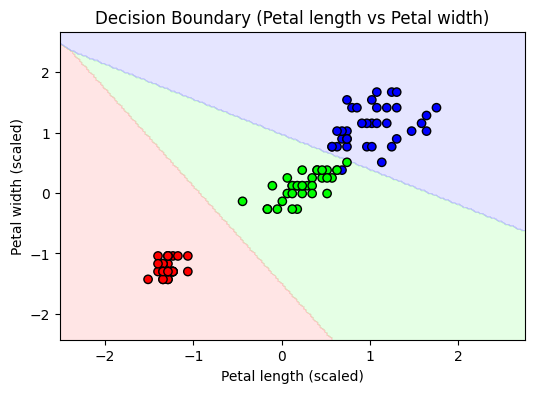

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Cross-validation accuracies: [0.91666667 0.95833333 0.95833333 0.95833333 1.        ]
Mean CV Accuracy: 0.9583333333333334


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# ================================================================
# Logistic Regression on Iris (Colab-ready, with Homework tasks)
# ================================================================

# 0) Setup
import sys
print(sys.version)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from matplotlib.colors import ListedColormap
import joblib

# 1) Load data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
target_names = iris.target_names
feature_names = iris.feature_names

print(f"Shape X: {X.shape}, y: {y.shape}")
display(X.head())
display(X.describe())

# 2) Explore data
# Histograms
ax = X.hist(bins=15, figsize=(10,6))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Scatter plot
plt.figure(figsize=(6,4))
for cls in np.unique(y):
    mask = (y == cls)
    plt.scatter(X.loc[mask, feature_names[2]], X.loc[mask, feature_names[3]],
                label=target_names[cls], alpha=0.8)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title("Petal length vs Petal width by species")
plt.legend()
plt.show()

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Train class counts:\n", y_train.value_counts().sort_index())
print("Test class counts:\n", y_test.value_counts().sort_index())

# 4) Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 5) Logistic Regression training
logreg = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs', random_state=42)
logreg.fit(X_train_scaled, y_train)
print("Training complete.")

# 6) Evaluation
y_pred = logreg.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(values_format='d')
plt.title("Confusion Matrix (Test)")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

# 7) Try a few new predictions
X_new = np.array([
    [5.1, 3.5, 1.4, 0.2],  # likely setosa
    [6.0, 2.8, 4.5, 1.5],  # likely versicolor
    [6.5, 3.0, 5.5, 2.0],  # likely virginica
])
X_new_scaled = scaler.transform(X_new)
preds = logreg.predict(X_new_scaled)
probs = logreg.predict_proba(X_new_scaled)
for i, (p, pr) in enumerate(zip(preds, probs)):
    print(f"Sample {i}: predicted -> {target_names[p]} | probabilities -> {np.round(pr, 3)}")

# 8) Save model
joblib.dump(logreg, "logreg_iris.joblib")
joblib.dump(scaler, "scaler_iris.joblib")
print("Saved: logreg_iris.joblib and scaler_iris.joblib")

# ================================================================
# Homework Experiments
# ================================================================

print("\n--- Homework Experiments ---")

# (A) Remove scaling
logreg_no_scaling = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs', random_state=42)
logreg_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = logreg_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Test Accuracy WITHOUT scaling: {acc_no_scaling:.4f}")

# (B) Change test_size = 0.3
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled  = scaler2.transform(X_test2)
logreg2 = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', random_state=42)
logreg2.fit(X_train2_scaled, y_train2)
y_pred2 = logreg2.predict(X_test2_scaled)
acc2 = accuracy_score(y_test2, y_pred2)
print(f"Test Accuracy with test_size=0.3: {acc2:.4f}")

# (C) L1 penalty with solver liblinear
logreg_l1 = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1', random_state=42)
logreg_l1.fit(X_train_scaled, y_train)
y_pred_l1 = logreg_l1.predict(X_test_scaled)
acc_l1 = accuracy_score(y_test, y_pred_l1)
print(f"Test Accuracy with L1 penalty: {acc_l1:.4f}")

# (D) Decision boundaries (petal length vs width)
X2 = X.iloc[:, [2, 3]].values
y2 = y.values
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=42, stratify=y2
)
scaler2d = StandardScaler()
X2_train_scaled = scaler2d.fit_transform(X2_train)
X2_test_scaled  = scaler2d.transform(X2_test)
logreg_2d = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', random_state=42)
logreg_2d.fit(X2_train_scaled, y2_train)

x_min, x_max = X2_train_scaled[:, 0].min() - 1, X2_train_scaled[:, 0].max() + 1
y_min, y_max = X2_train_scaled[:, 1].min() - 1, X2_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = logreg_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF']))
plt.scatter(X2_train_scaled[:, 0], X2_train_scaled[:, 1],
            c=y2_train, edgecolor='k',
            cmap=ListedColormap(['#FF0000','#00FF00','#0000FF']))
plt.xlabel("Petal length (scaled)")
plt.ylabel("Petal width (scaled)")
plt.title("Decision Boundary (Petal length vs Petal width)")
plt.show()

# (E) Cross-validation
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())